In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
data = pd.read_csv('data/combined.csv')

In [195]:
df = data.copy(deep=True)

In [196]:
df.shape

(1309, 12)

In [197]:
df.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'Ticket', 'Fare',
       'Parch', 'Cabin', 'SibSp', 'Embarked', 'Survived'],
      dtype='object')

In [198]:
df.describe()

,PassengerId,Age,Pclass,Fare,Parch,SibSp,Survived
count,1309.000000,1046.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.881138,2.294882,33.295479,0.385027,0.498854,0.377387
std,378.020061,14.413493,0.837836,51.758668,0.865560,1.041658,0.484918
min,1.000000,0.170000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,2.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,28.000000,3.000000,14.454200,0.000000,0.000000,0.000000
75%,982.000000,39.000000,3.000000,31.275000,0.000000,1.000000,1.000000
max,1309.000000,80.000000,3.000000,512.329200,9.000000,8.000000,1.000000


In [210]:
df.isna().sum()

Sex         0
Age         0
Pclass      0
Fare        0
Parch       0
SibSp       0
Embarked    0
Survived    0
dtype: int64

In [211]:
df.isnull().sum()

Sex         0
Age         0
Pclass      0
Fare        0
Parch       0
SibSp       0
Embarked    0
Survived    0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

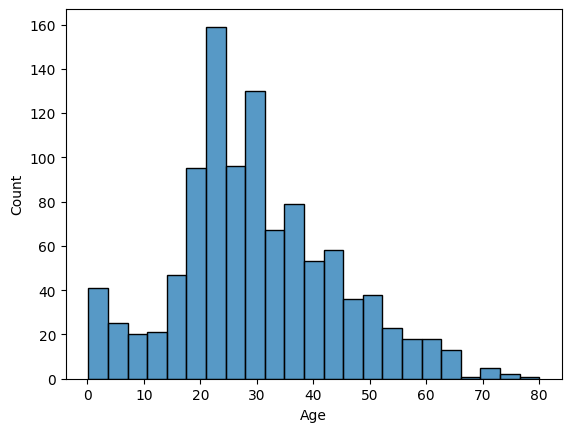

In [201]:
sns.histplot(df['Age'])

In [202]:
df['Age'].median()

28.0

In [203]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [204]:
df = df.drop(columns='Cabin',axis=1)

In [205]:
df[df['Fare'].isna() == True]

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Parch,SibSp,Embarked,Survived
1043,1044,"Storey, Mr. Thomas",male,60.5,3,3701,NaN,0,0,S,0


In [206]:
df[df['Embarked'].isna() == True]

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Parch,SibSp,Embarked,Survived
61,62,"Icard, Miss. Amelie",female,38.0,1,113572,80.0,0,0,NaN,1
829,830,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,1,113572,80.0,0,0,NaN,1


In [207]:
df = df.drop([1043, 61, 829], axis=0)

In [208]:
df = df.drop(columns=['Name','PassengerId','Ticket'],axis=1)

In [209]:
df

,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked,Survived
0,male,22.000000,3,7.2500,0,1,S,0
1,female,38.000000,1,71.2833,0,1,C,1
2,female,26.000000,3,7.9250,0,0,S,1
3,female,35.000000,1,53.1000,0,1,S,1
4,male,35.000000,3,8.0500,0,0,S,0
...,...,...,...,...,...,...,...,...
1304,male,29.881138,3,8.0500,0,0,S,0
1305,female,39.000000,1,108.9000,0,0,C,1
1306,male,38.500000,3,7.2500,0,0,S,0
1307,male,29.881138,3,8.0500,0,0,S,0


In [222]:
df.columns

Index(['Sex', 'Age', 'Pclass', 'Fare', 'Parch', 'SibSp', 'Embarked',
       'Survived'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='Age'>

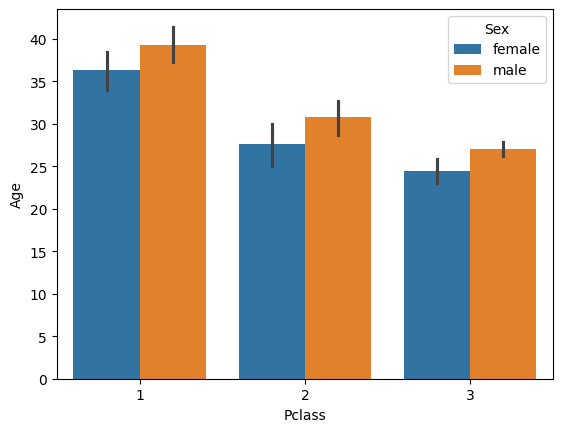

In [218]:
sns.barplot(data=df,x=df['Pclass'],y=df['Age'],hue=df['Sex'])

<Axes: xlabel='Parch', ylabel='Age'>

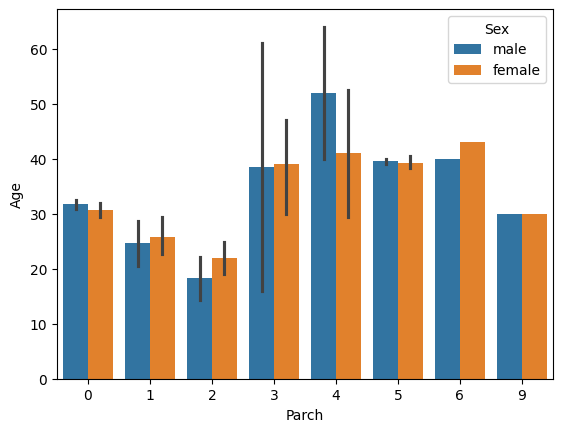

In [223]:
sns.barplot(data=df,x=df['Parch'],y=df['Age'],hue=df['Sex'])

C = Cherbourg, Q = Queenstown, S = Southampton


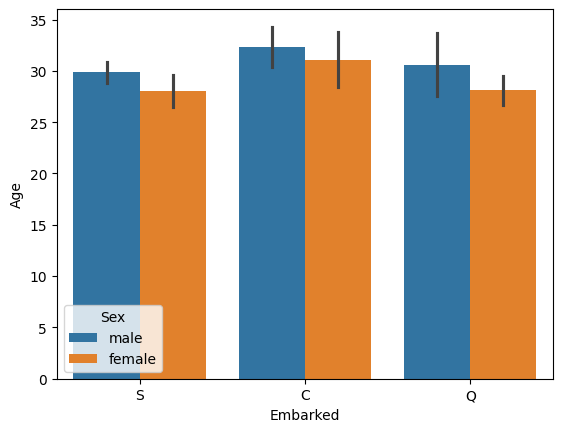

In [226]:
sns.barplot(data=df,x=df['Embarked'],y=df['Age'],hue=df['Sex'])
print('C = Cherbourg, Q = Queenstown, S = Southampton')

C = Cherbourg, Q = Queenstown, S = Southampton


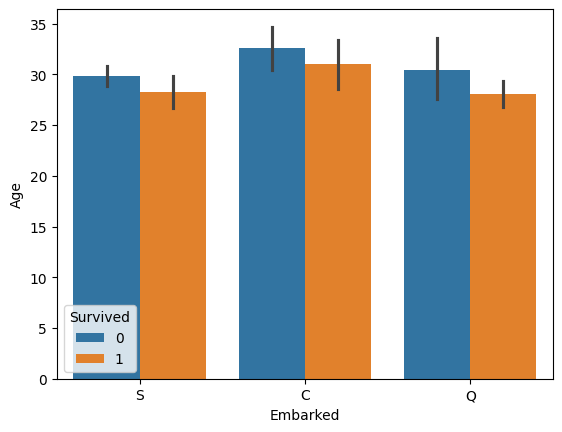

In [227]:
sns.barplot(data=df,x=df['Embarked'],y=df['Age'],hue=df['Survived'])
print('C = Cherbourg, Q = Queenstown, S = Southampton')

<Axes: xlabel='Sex', ylabel='Age'>

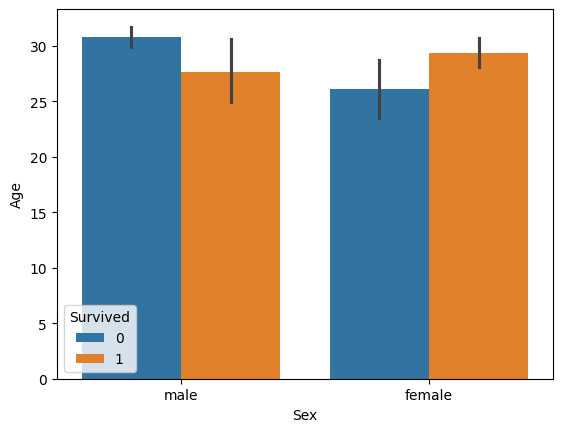

In [229]:
sns.barplot(data=df,x=df['Sex'],y=df['Age'],hue=df['Survived'])

In [237]:
print(df['SibSp'].unique())
print('of siblings / spouses on aboard')

[1 0 3 4 2 5 8]
of siblings / spouses on aboard


<Axes: xlabel='SibSp', ylabel='Age'>

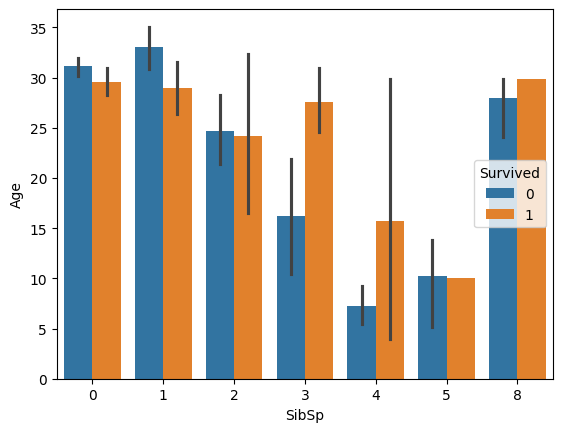

In [238]:
sns.barplot(data=df,x=df['SibSp'],y=df['Age'],hue=df['Survived'])

<Axes: xlabel='Age', ylabel='Fare'>

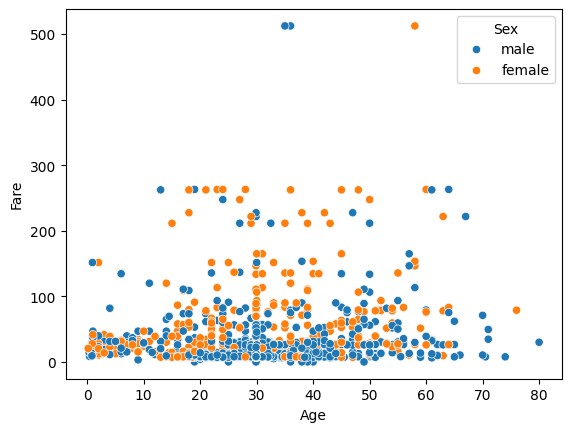

In [241]:
sns.scatterplot(data=df,x=df['Age'],y=df['Fare'],hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Fare'>

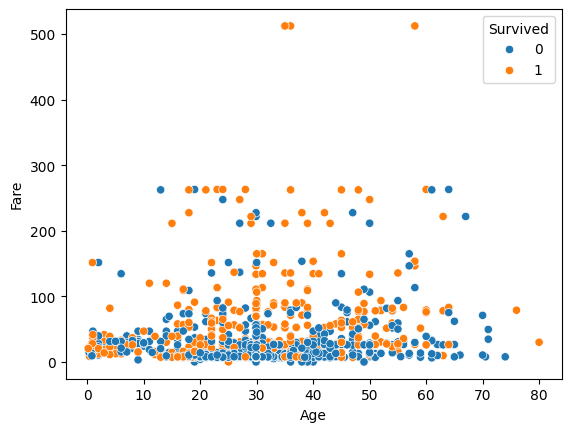

In [246]:
sns.scatterplot(data=df,x=df['Age'],y=df['Fare'],hue=df['Survived'])

<Axes: >

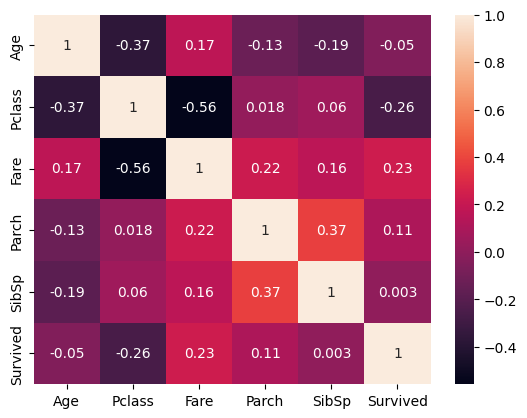

In [257]:
sns.heatmap(data=df[['Age','Pclass','Fare','Parch','SibSp','Survived']].corr(),annot=True)

In [248]:
ct = pd.crosstab(df['Survived'],df['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,733,814
1,383,109,492
All,464,842,1306


In [249]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=617.1261605892105, pvalue=3.04443052972514e-132, dof=4, expected_freq=array([[ 289.20061256,  524.79938744,  814.        ],
       [ 174.79938744,  317.20061256,  492.        ],
       [ 464.        ,  842.        , 1306.        ]]))

In [258]:
score = []

for feature in df.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(df['Survived'], df[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

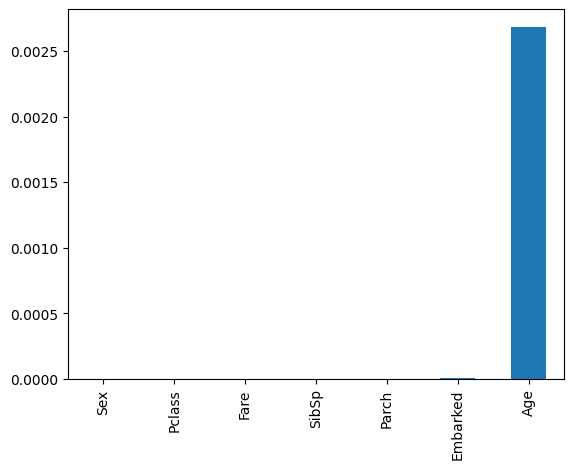

In [260]:
pd.Series(score, index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [262]:
df = df[['Sex','Pclass','Fare','SibSp','Parch','Embarked','Survived']]

In [264]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

C:\Users\MICRO\AppData\Local\Temp\ipykernel_14992\3444169913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = label_encoder.fit_transform(df['Pclass'])


In [266]:
columns_to_encode = ['Sex','Embarked']
encoded_columns = pd.get_dummies(df, columns=columns_to_encode)
df = pd.concat([df, encoded_columns], axis=1)
df = df.drop(columns_to_encode, axis=1)

In [276]:
df.columns

Index(['Fare', 'SibSp', 'Parch', 'Survived', 'Fare', 'SibSp', 'Parch',
       'Survived', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [277]:
df = df.T.drop_duplicates().T

In [295]:
order = ['Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','SibSp','Parch','Survived']
df = df[order]
df

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp,Parch,Survived
0,7.25,False,True,False,False,True,1,0,0
1,71.2833,True,False,True,False,False,1,0,1
2,7.925,True,False,False,False,True,0,0,1
3,53.1,True,False,False,False,True,1,0,1
4,8.05,False,True,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...
1304,8.05,False,True,False,False,True,0,0,0
1305,108.9,True,False,True,False,False,0,0,1
1306,7.25,False,True,False,False,True,0,0,0
1307,8.05,False,True,False,False,True,0,0,0


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Fare        1306 non-null   int32
 1   Sex_female  1306 non-null   bool 
 2   Sex_male    1306 non-null   bool 
 3   Embarked_C  1306 non-null   bool 
 4   Embarked_Q  1306 non-null   bool 
 5   Embarked_S  1306 non-null   bool 
 6   SibSp       1306 non-null   int32
 7   Parch       1306 non-null   int32
 8   Survived    1306 non-null   int32
dtypes: bool(5), int32(4)
memory usage: 69.3 KB


In [297]:

columns_to_convert = ['Fare', 'Survived', 'Parch','SibSp']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [299]:
columns_to_convert = ['Sex_female', 'Sex_male', 'Embarked_C','Embarked_Q','Embarked_S']
df[columns_to_convert] = df[columns_to_convert].astype(bool)

In [301]:
X = df.drop(columns='Survived')
y = df['Survived']

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [304]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [305]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.8320610687022901


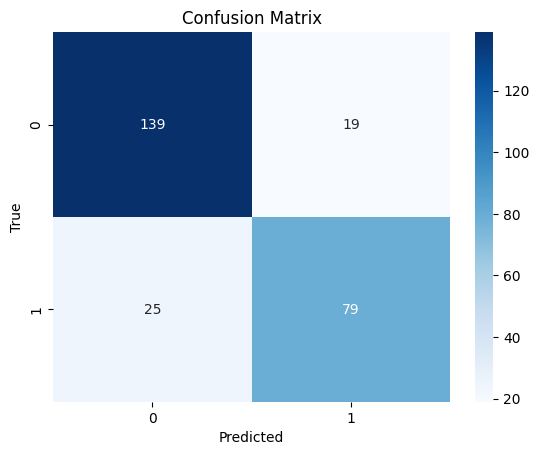

In [307]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Step 4: Plot the confusion matrix
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

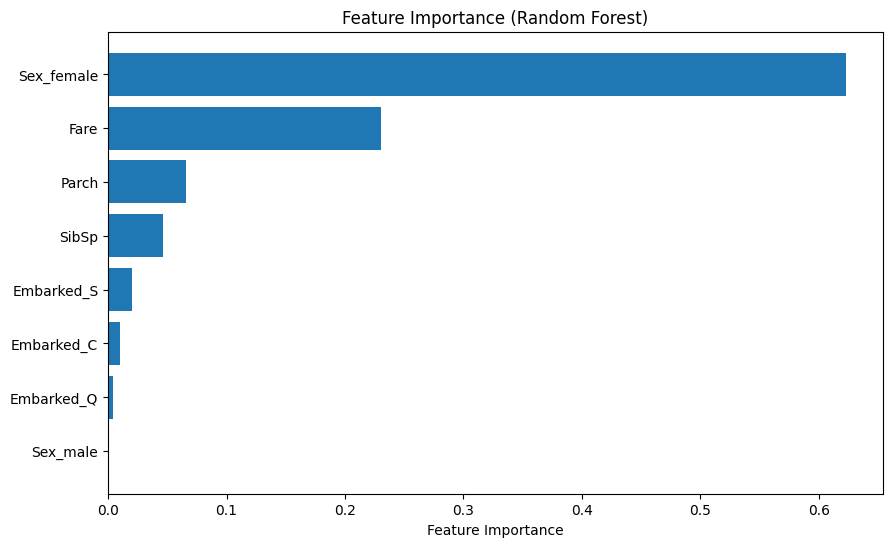

In [308]:
feature_importances = dtree.feature_importances_

# Define feature names manually or access them from wherever you defined them
feature_names = ['Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','SibSp','Parch']  # Replace with your actual feature names

# Sort feature names by importances
sorted_feature_names = [x for _, x in sorted(zip(feature_importances, feature_names), reverse=True)]

# Sort the importances accordingly
sorted_importances = np.sort(feature_importances)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()